## [HMMJ](https://www.horizonsetfs.com/horizons/media/pdfs/productsheets/HMMJ-Product-Sheet.pdf)

## FNGU 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

!pip install yfinance
import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime
 
import matplotlib.pyplot as plt
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
plt.style.use('fivethirtyeight')  
  
  
#start = datetime.datetime(2016,1,1)
start = datetime.datetime(2018, 2, 1)
end   = datetime.datetime(2020, 9, 13)#datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


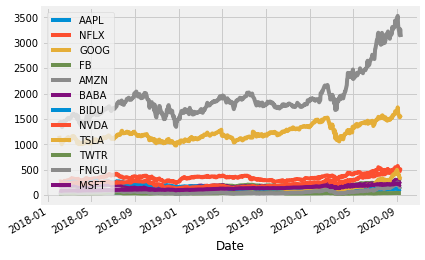

In [2]:
# ls = ['HMMJ.TO','ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# data = {} 

# for i in ls:
#   arry= yf.download(i, start, end)
#   if i == 'HMMJ.TO':
#     i = 'HMMJ'
#   data[i]= arry["Adj Close"]


ls = ['AAPL','NFLX','GOOG','FB','AMZN','BABA','BIDU','NVDA','TSLA','TWTR','FNGU', 'MSFT'] # ,'weed'
data = {} 

for i in ls:
  arry= yf.download(i, start, end)
  if i == 'HMMJ.TO':
    i = 'HMMJ'
  data[i]= arry["Adj Close"]
stocks = pd.DataFrame(data)

# stocks=stocks.dropna()
stocks.plot(grid = True)

In [3]:
np.sum(stocks.isna())
stocks.head(5)

AAPL    0
NFLX    0
GOOG    0
FB      0
AMZN    0
BABA    0
BIDU    0
NVDA    0
TSLA    0
TWTR    0
FNGU    0
MSFT    0
dtype: int64

,AAPL,NFLX,GOOG,FB,AMZN,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-02-01,40.433929,265.070007,1167.699951,193.089996,1390.000000,192.220001,240.529999,238.574722,69.849998,27.139999,56.144001,90.585373
2018-02-02,38.679497,267.429993,1111.900024,190.279999,1429.949951,187.309998,233.169998,231.650589,68.750000,25.920000,52.525002,88.202042
2018-02-05,37.713100,254.259995,1055.800049,181.259995,1390.000000,180.529999,225.320007,211.989243,66.625999,25.129999,46.160000,84.569420
2018-02-06,39.289200,265.720001,1080.599976,185.309998,1442.839966,185.169998,228.770004,223.774155,66.793999,25.240000,49.317001,87.769585
2018-02-07,38.448132,264.559998,1048.579956,180.179993,1416.780029,180.300003,222.500000,226.968353,69.000000,26.910000,49.650002,86.116646


In [4]:
roi = (stocks.iloc[-1] - stocks.iloc[1])/stocks.iloc[1]
roi = roi*100
roi

AAPL    189.559093
NFLX     80.245302
GOOG     36.767689
FB       40.114561
AMZN    117.925108
BABA     45.005600
BIDU    -48.269501
NVDA    110.049104
TSLA    442.138184
TWTR     50.192902
FNGU    204.140876
MSFT    131.321175
dtype: float64

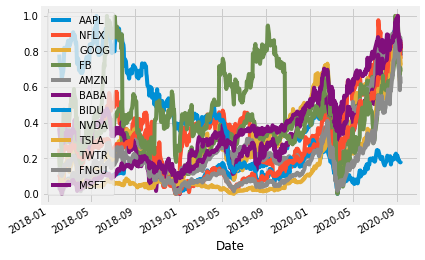

In [5]:
def normIt(df):
  # mean norm  # normalized_df=(df-df.mean())/df.std()
   return (df-df.min())/(df.max()-df.min()) 

stocks_norm = normIt(stocks)
stocks_norm.plot()

# selecting most correlated


In [6]:
from scipy.stats import spearmanr
stocks_norm_spearmanr = pd.DataFrame(spearmanr(stocks_norm)[0], columns=stocks.columns)
stocks_norm_spearmanr_cumSum = stocks_norm_spearmanr.cumsum()
stocks_norm_spearmanr_cumSum

,AAPL,NFLX,GOOG,FB,AMZN,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
0,1.000000,0.490699,0.872508,0.678691,0.827156,0.618765,-0.553945,0.655294,0.548980,0.067866,0.527108,0.906422
1,1.490699,1.490699,1.395195,1.204584,1.568808,1.193745,-0.629119,1.265803,0.971842,0.230720,1.155824,1.399842
2,2.363206,2.013386,2.395195,1.988976,2.342637,1.909681,-1.056339,1.866243,1.492325,0.438043,1.758197,2.241608
3,3.041897,2.539279,3.179586,2.988976,2.971262,2.686593,-1.344871,2.409785,1.907200,0.866557,2.401399,2.901981
4,3.869053,3.280931,3.953414,3.617601,3.971262,3.183146,-1.830740,2.984053,2.293927,1.051073,2.884306,3.733431
5,4.487818,3.855911,4.669351,4.394513,4.467815,4.183146,-1.918725,3.723081,2.968280,1.168245,3.670299,4.282667
6,3.933873,3.780737,4.242131,4.105981,3.981946,4.095161,-0.918725,3.808204,2.907455,1.140522,3.976363,3.522814
7,4.589167,4.391246,4.842572,4.649523,4.556213,4.834188,-0.833602,4.808204,3.597542,1.082155,4.873911,3.928540
8,5.138147,4.814108,5.363054,5.064398,4.942940,5.508542,-0.894427,5.498291,4.597542,0.863884,5.547122,4.398680
9,5.206013,4.976962,5.570377,5.492912,5.127456,5.625714,-0.922150,5.439924,4.379272,1.863884,5.672221,4.510340


In [7]:
corrwith = stocks_norm.corr()
corr_cumSum= corrwith.cumsum()
corr_cumSum

,AAPL,NFLX,GOOG,FB,AMZN,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
AAPL,1.000000,0.736130,0.922298,0.846213,0.913270,0.850691,-0.499789,0.860479,0.912375,0.076037,0.832919,0.935712
NFLX,1.736130,1.736130,1.602785,1.578087,1.793245,1.599494,-0.684373,1.657617,1.712285,0.226090,1.624608,1.630035
GOOG,2.658428,2.416618,2.602785,2.443700,2.619663,2.441555,-1.155922,2.414496,2.508914,0.401837,2.394377,2.529923
FB,3.504641,3.148492,3.468398,3.443700,3.434857,3.327302,-1.470137,3.197533,3.287146,0.786205,3.220018,3.321674
AMZN,4.417911,4.028467,4.294816,4.258895,4.434857,4.112241,-1.904617,4.053284,4.204007,0.947450,4.054024,4.200418
BABA,5.268602,4.777271,5.136877,5.144642,5.219796,5.112241,-2.103313,4.904680,5.049528,1.128126,4.927490,4.959497
BIDU,4.768813,4.592687,4.665327,4.830427,4.785316,4.913545,-1.103313,4.839720,4.738665,1.135765,4.915768,4.236647
NVDA,5.629292,5.389825,5.422207,5.613464,5.641067,5.764942,-1.168272,5.839720,5.638110,1.178585,5.843511,4.930912
TSLA,6.541667,6.189735,6.218835,6.391696,6.557928,6.610462,-1.479134,6.739165,6.638110,1.261854,6.760661,5.743339
TWTR,6.617704,6.339789,6.394582,6.776064,6.719173,6.791138,-1.471495,6.781985,6.721379,2.261854,7.010583,5.825642


In [8]:
keepThese = stocks_norm_spearmanr_cumSum.loc[:, stocks_norm_spearmanr_cumSum.iloc[-1] > 3]
keepThese

,AAPL,NFLX,GOOG,FB,AMZN,BABA,NVDA,TSLA,FNGU,MSFT
0,1.000000,0.490699,0.872508,0.678691,0.827156,0.618765,0.655294,0.548980,0.527108,0.906422
1,1.490699,1.490699,1.395195,1.204584,1.568808,1.193745,1.265803,0.971842,1.155824,1.399842
2,2.363206,2.013386,2.395195,1.988976,2.342637,1.909681,1.866243,1.492325,1.758197,2.241608
3,3.041897,2.539279,3.179586,2.988976,2.971262,2.686593,2.409785,1.907200,2.401399,2.901981
4,3.869053,3.280931,3.953414,3.617601,3.971262,3.183146,2.984053,2.293927,2.884306,3.733431
5,4.487818,3.855911,4.669351,4.394513,4.467815,4.183146,3.723081,2.968280,3.670299,4.282667
6,3.933873,3.780737,4.242131,4.105981,3.981946,4.095161,3.808204,2.907455,3.976363,3.522814
7,4.589167,4.391246,4.842572,4.649523,4.556213,4.834188,4.808204,3.597542,4.873911,3.928540
8,5.138147,4.814108,5.363054,5.064398,4.942940,5.508542,5.498291,4.597542,5.547122,4.398680
9,5.206013,4.976962,5.570377,5.492912,5.127456,5.625714,5.439924,4.379272,5.672221,4.510340


In [9]:
stocks_norm_high_corr = corrwith[keepThese]

dropAllButThese = keepThese.columns.to_list()
dropAllButThese.append("FNGU")
dropAllButThese= list(set(dropAllButThese))
dropAllButThese

['FNGU', 'NFLX', 'GOOG', 'AMZN', 'AAPL', 'MSFT', 'NVDA', 'TSLA', 'FB', 'BABA']

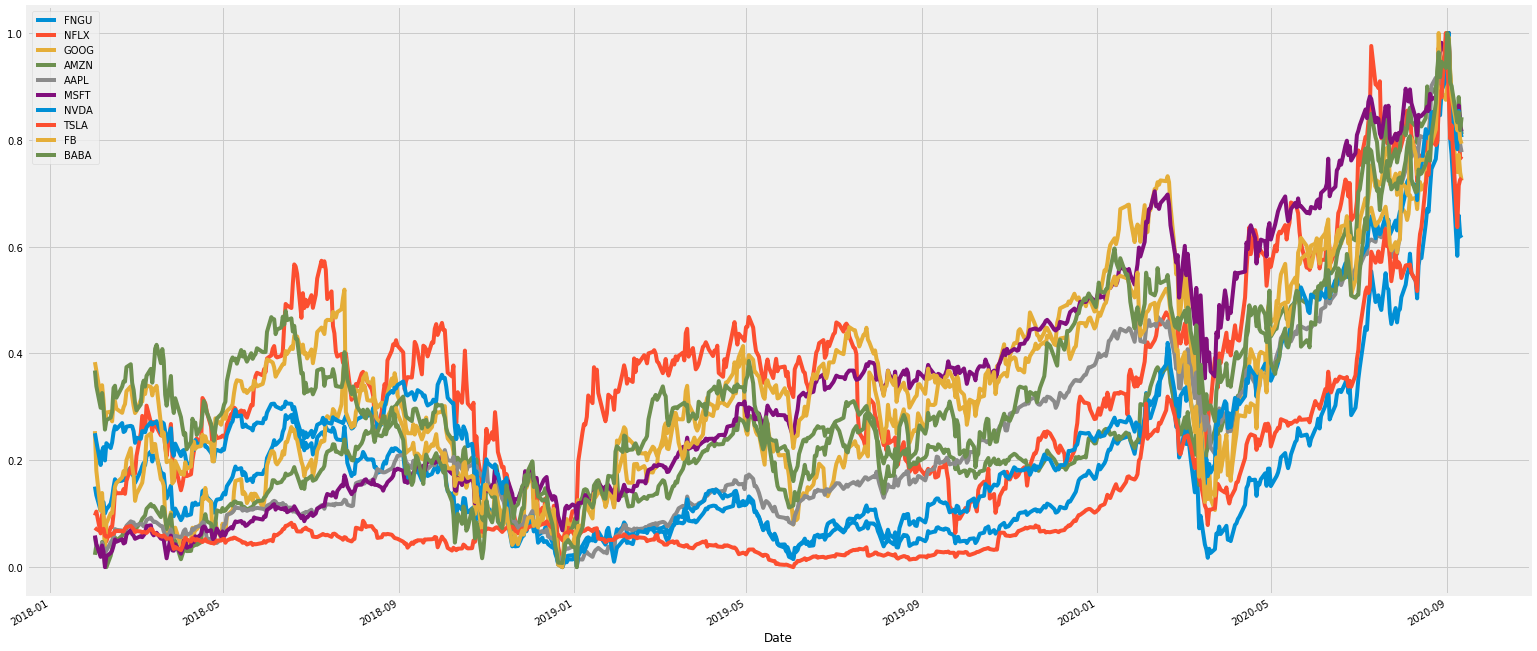

In [10]:
stocks_main = stocks[dropAllButThese]
stocks_main_norm = normIt(stocks_main)
stocks_main_norm.plot(figsize=(24,12))

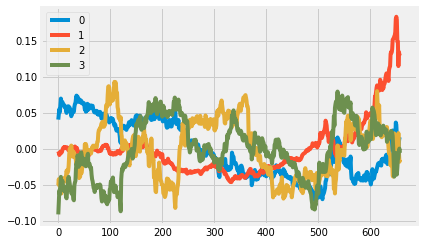

In [11]:
from sklearn.decomposition import FastICA

ica = FastICA(4, max_iter = 900)
stock_ica = ica.fit_transform(stocks_main_norm)
stock_ica = pd.DataFrame(stock_ica)
stock_ica.plot()

In [12]:
# ls = ['HMMJ.TO','ogi','hexo','cweb','smg','apha','gwprf','tlry','acb','cron','weed.TO'] # ,'weed'
# data = {} 

# for i in ls:
#   arry= yf.download(i, start, end)
#   if i == 'HMMJ.TO':
#     i = 'HMMJ'
#   data[i]= arry["Adj Close"]


ls = ['AAPL','NFLX','GOOG','AMZN','NVDA', 'MSFT', 'SPY', 'QQQ'] # ,'weed'
data = {} 

for i in ls:
  arry = yf.download(i, datetime.datetime(2009, 1, 1), datetime.datetime(2020, 9, 13))
  data[i]= arry["Adj Close"]
stocks = pd.DataFrame(data)

stocks_main_norm = normIt(stocks)
np.sum(stocks_main_norm.isna())
stocks_main_norm.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL    0
NFLX    0
GOOG    0
AMZN    0
NVDA    0
MSFT    0
SPY     0
QQQ     0
dtype: int64

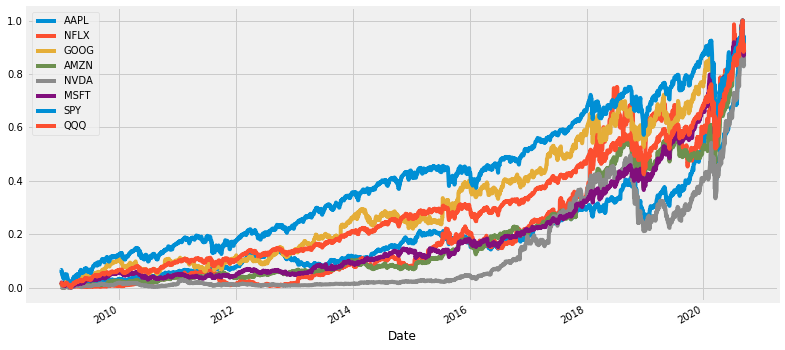

In [13]:
stocks_main_norm.plot(figsize=(12,6))

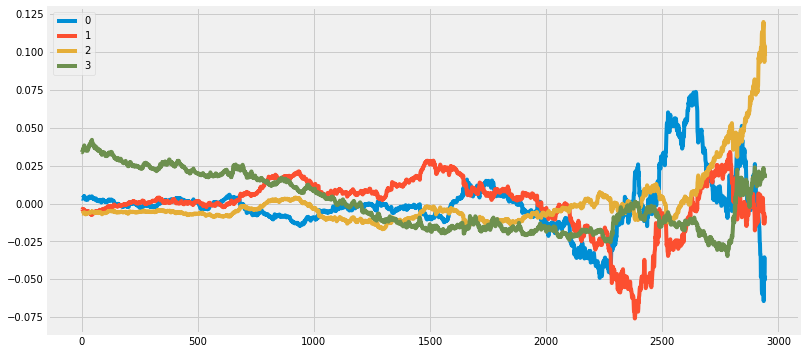

In [14]:
ica = FastICA(4, max_iter = 900)
stock_ica = ica.fit_transform(stocks_main_norm)
stock_ica = pd.DataFrame(stock_ica)
stock_ica.plot(figsize=(12,6))

In [15]:
stocks_main_norm

,AAPL,NFLX,GOOG,AMZN,NVDA,MSFT,SPY,QQQ
Date,,,,,,,,
2009-01-02,0.002939,0.000085,0.012103,0.001700,0.002432,0.017604,0.064798,0.016869
2009-01-05,0.003836,0.000621,0.014215,0.001614,0.002691,0.018263,0.064511,0.016837
2009-01-06,0.003471,0.000879,0.016101,0.002561,0.003178,0.019095,0.066128,0.017826
2009-01-07,0.003000,0.000820,0.012320,0.002228,0.002286,0.014760,0.058827,0.014988
2009-01-08,0.003396,0.000934,0.013318,0.002504,0.001929,0.016876,0.059792,0.016008
...,...,...,...,...,...,...,...,...
2020-09-04,0.899671,0.926674,0.913546,0.932004,0.878427,0.920913,0.950190,0.931450
2020-09-08,0.837895,0.910325,0.876600,0.890437,0.828394,0.868234,0.919375,0.882735
2020-09-09,0.872047,0.897960,0.892077,0.924537,0.884950,0.907459,0.941038,0.911077


# Prediction



In [16]:
y_scaled_train = stocks_main_norm["QQQ"].values
X_scaled_train = stocks_main_norm.drop(["QQQ"], axis=1).values

split = int(X_scaled_train.shape[0] * 0.9)
print(f'len of all data {X_scaled_train.shape[0]}, len of Split {split}')

train = X_scaled_train[:split]
valid = X_scaled_train[split:]

y_train_ = y_scaled_train[:split]
y_valid_ = y_scaled_train[split:]

train.shape
y_train_.shape

valid.shape
y_valid_.shape

len of all data 2944, len of Split 2649


(2649, 7)

(2649,)

(295, 7)

(295,)

In [17]:
# stocks_main_norm.tail(2)
# y_valid[valid.shape[0]-1]

In [18]:
seqLen = 20

x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(seqLen,train.shape[0]):
    x_train.append(train[i-seqLen:i,0])
    y_train.append(y_train_[i])

for z in range(seqLen,valid.shape[0]):
    x_test.append(valid[z-seqLen:z,0])
    y_test.append(y_valid_[z])

x_train, y_train,x_test,y_test = np.array(x_train), np.array(y_train),np.array(x_test),np.array(y_test)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

x_train.shape
x_test.shape

(2629, 20, 1)

(275, 20, 1)

In [19]:
import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, CuDNNGRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [20]:
def makeModel():
  model = Sequential()

  # model.add(LSTM(100, return_sequences=True, stateful=True, batch_size=1, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(LSTM(100, dropout=0.4, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(BatchNormalization())
  model.add(CuDNNLSTM(135, return_sequences=True))   # recurrent_dropout=0.1 will prevent cuDNN, using TF2
  model.add(Dense(160))
  model.add(CuDNNLSTM(160, return_sequences=False))   # recurrent_dropout=0.1 will prevent cuDNN, using TF2
  model.add(Dense(60)) # sigmoid or elu
  model.add(Dense(1))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error') # metrics=['mean_squared_error', 'mae']
  return model

In [21]:
epochs = 120
batch_size = 16
callbacks=[]
model = makeModel()

stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min', restore_best_weights=True)
callbacks.append(stop)  
# callbacks.append(ModelCheckpoint('./my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min'))
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min'))

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  callbacks=callbacks, validation_split =.1, shuffle=True) # valadation_splite is not random. shuffle=False TODO  stateful=True

Epoch 1/120
148/148 [==============================] - 9s 58ms/step - loss: 0.0181 - val_loss: 0.0947
Epoch 2/120
148/148 [==============================] - 1s 9ms/step - loss: 0.0042 - val_loss: 0.1118
Epoch 3/120
148/148 [==============================] - 1s 9ms/step - loss: 0.0023 - val_loss: 0.1412
Epoch 4/120
148/148 [==============================] - 1s 8ms/step - loss: 0.0017 - val_loss: 0.1120
Epoch 5/120
143/148 [===========================>..] - ETA: 0s - loss: 0.0015
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
148/148 [==============================] - 1s 8ms/step - loss: 0.0015 - val_loss: 0.1025
Epoch 6/120
148/148 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 0.0544
Epoch 7/120
148/148 [==============================] - 1s 8ms/step - loss: 0.0010 - val_loss: 0.0631
Epoch 8/120
148/148 [==============================] - 1s 9ms/step - loss: 0.0011 - val_loss: 0.0561
Epoch 9/120
148/148 [========================

Text(0.5, 1.0, 'model MSE')

Text(0, 0.5, 'Mean Squared Error')

Text(0.5, 0, 'epoch')

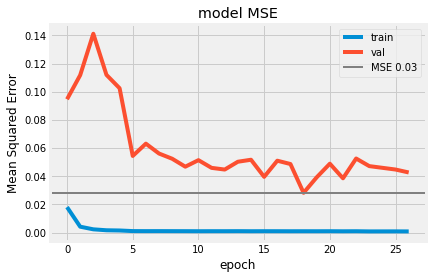

loss 		 0.0008518504328094423
val loss 	 0.028236806392669678


In [22]:
# history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axhline(stop.best,linewidth=2, color='gray')
plt.title('model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'MSE '+str(round(stop.best,2))], loc='upper right')
plt.show()
print('loss \t\t', min(history.history['loss']))
print('val loss \t', min(history.history['val_loss']))

[]

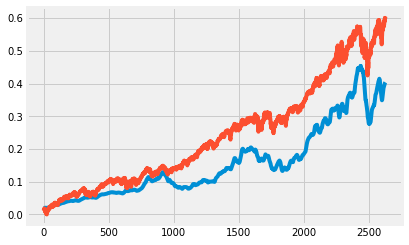

In [23]:
plt.plot(model.predict(x_train))
plt.plot(y_train)
plt.plot(figsize=(12,6))

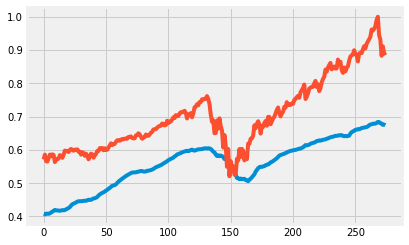

In [24]:
plt.plot(model.predict(x_test))
plt.plot(y_test)

In [25]:
time_series = stock_ica.values

seqLen = 20

x_train,y_train,x_test,y_test = [],[],[],[]
for i in range(train.shape[0] - seqLen):
    x_train.append(time_series[i:i + seqLen, :])
    y_train.append(time_series[i + seqLen])

for i in range(seqLen,valid.shape[0]):
    x_test.append(time_series[i:i + seqLen, :])
    y_test.append(time_series[i + seqLen])

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train.shape
y_train.shape

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 4))
x_test  = np.reshape(x_test,  (x_test.shape[0],  x_test.shape[1],  4))

x_train.shape
y_train.shape

(2629, 20, 4)

(2629, 4)

(2629, 20, 4)

(2629, 4)

In [26]:
def makeModel():
  model = Sequential()
  model.add(LSTM(100, dropout=0.4, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))

  model.add(CuDNNLSTM(135, return_sequences=True))   # recurrent_dropout=0.1 will prevent cuDNN, using TF2
  model.add(Dense(160))
  model.add(CuDNNLSTM(160, return_sequences=False))   # recurrent_dropout=0.1 will prevent cuDNN, using TF2
  model.add(Dense(60))
  model.add(Dense(4))

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error') # metrics=['mean_squared_error', 'mae']
  return model

In [27]:
epochs = 120
batch_size = 32
callbacks=[]
model = makeModel()

callbacks.append(EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='min', restore_best_weights=True))  
# callbacks.append(ModelCheckpoint('./my_model.hdf5', save_best_only=True, monitor='val_loss', mode='min'))
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min'))

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks, validation_split=0.1, shuffle=True) # valadation_splite is not random. shuffle=False TODO  stateful=True

Epoch 1/120
74/74 [==============================] - 5s 68ms/step - loss: 6.1643e-04 - val_loss: 6.5927e-04
Epoch 2/120
74/74 [==============================] - 1s 10ms/step - loss: 1.4266e-04 - val_loss: 5.2329e-04
Epoch 3/120
74/74 [==============================] - 1s 10ms/step - loss: 8.1942e-05 - val_loss: 3.2112e-04
Epoch 4/120
74/74 [==============================] - 1s 9ms/step - loss: 6.0622e-05 - val_loss: 3.7090e-04
Epoch 5/120
74/74 [==============================] - 1s 10ms/step - loss: 5.4095e-05 - val_loss: 3.5988e-04
Epoch 6/120
74/74 [==============================] - 1s 13ms/step - loss: 4.7397e-05 - val_loss: 2.7847e-04
Epoch 7/120
71/74 [===========================>..] - ETA: 0s - loss: 4.3438e-05
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
74/74 [==============================] - 1s 10ms/step - loss: 4.4056e-05 - val_loss: 2.7884e-04
Epoch 8/120
74/74 [==============================] - 1s 9ms/step - loss: 1.8932e-05 - val_loss: 2

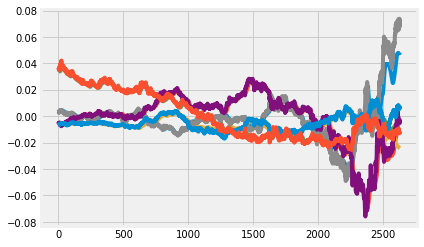

In [28]:
plt.plot(model.predict(x_train))
plt.plot(y_train)

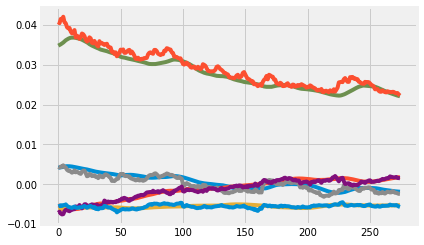

In [29]:
plt.plot(model.predict(x_test))
plt.plot(y_test)

(2629, 8)

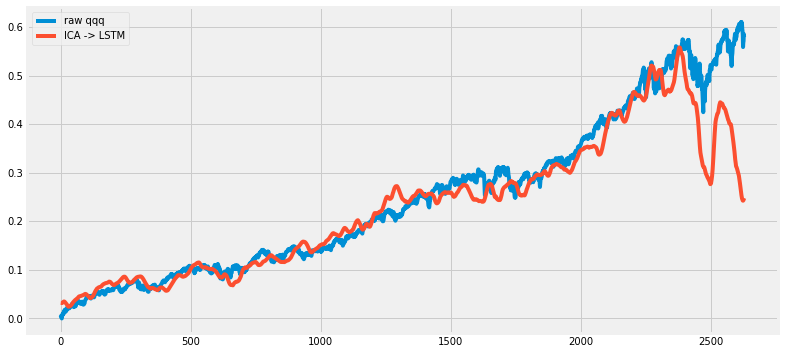

In [30]:
inv = ica.inverse_transform(model.predict(x_train))
inv.shape

df = pd.DataFrame({
    'raw qqq': stocks_main_norm[:-275]["QQQ"].tolist()[40:],
    'ICA -> LSTM' : list(inv[:,-1])
})

df.plot(figsize=(12,6))

(275, 8)

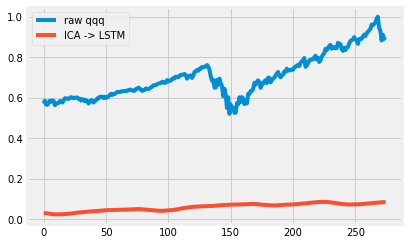

In [31]:
inv = ica.inverse_transform(model.predict(x_test))
inv.shape

df = pd.DataFrame({
    'raw qqq': stocks_main_norm[-275:]["QQQ"].tolist(),
    'ICA -> LSTM' : list(inv[:,-1])
})

df.plot()

TODO make plots like these https://github.com/akhil2706/Stock-Price-Prediction-using-LSTMs-and-ICA/blob/master/final_project.ipynb

In [32]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(stocks_main_norm["FNGU"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


KeyError: ignored

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [ ]:
 
from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 